#Código do Renato

##Cores

In [74]:
#!pip install sympy
#!pip install tbcontrol
#!pip install control
#!pip install slycot
#!pip install ipywidgets


In [75]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import control as ct
import scipy
from control.matlab import *
from numpy.linalg import matrix_rank



In [76]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'dred': (0.839, 0.0, 0.027),
    'dgreen': (0.341, 0.494, 0.094),
    'dblue': (0.063, 0.318, 0.475),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

##Parâmetros

In [77]:
#constantes
R=0.2
Ea=380
k_e=145000
b_e=2560
k_c=145000
b_c=2560
m_e=1000
m_c=900
K=50
g=9.81

##Sistema Linearizado

In [78]:
# Matrizes do Sistema Linearizado
A = np.array([[-(k_e + k_c)/(b_c+b_e), -k_e/(b_c*R + b_e*R), k_c/(b_c*R + b_e*R), -b_e/(b_c*R + b_e*R), b_c/(b_c*R + b_e*R)],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 0, 1],
              [-k_e*R/m_e, -k_e/m_e, 0, -b_e/m_e, 0],
              [k_c*R/m_c, 0, -k_c/m_c, 0, -b_c/m_c]])

B = np.array([[K/(R*R*(b_c+b_e))], [0], [0], [0], [0]])
C = np.array([[1,0,0,0,0],[0,0,0,1,0],[0,0,0,0,1]])
D = [[0],[0],[0]]
E = np.array([[0],[0],[0],[0],[0]])


In [79]:
#Sistema en malha aberta na forma de espaço de estados

elevador_SS = ct.ss(A, B, C, D)
print(elevador_SS)



<StateSpace>: sys[15]
Inputs (1): ['u[0]']
Outputs (3): ['y[0]', 'y[1]', 'y[2]']
States (5): ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]']

A = [[ -56.640625   -141.6015625   141.6015625    -2.5           2.5       ]
     [   0.            0.            0.            1.            0.        ]
     [   0.            0.            0.            0.            1.        ]
     [ -29.         -145.            0.           -2.56          0.        ]
     [  32.22222222    0.         -161.11111111    0.           -2.84444444]]

B = [[0.24414062]
     [0.        ]
     [0.        ]
     [0.        ]
     [0.        ]]

C = [[1. 0. 0. 0. 0.]
     [0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 1.]]

D = [[0.]
     [0.]
     [0.]]



[[ 9.00000000e+00  2.53199865e+00 -9.41097616e-01 ...  4.55478474e+01
   4.55478475e+01  4.55478477e+01]
 [ 1.50000000e+00  1.47989195e+00  1.43121781e+00 ... -9.10956994e+00
  -9.10956977e+00 -9.10956960e+00]
 [-1.00000000e+00 -9.81667357e-01 -9.39500854e-01 ...  9.10956901e+00
   9.10956924e+00  9.10956947e+00]
 [ 0.00000000e+00 -3.69018735e+00 -5.85676311e+00 ...  1.66922586e-05
   1.67915933e-05  1.66021296e-05]
 [ 0.00000000e+00  3.30060670e+00  4.92824539e+00 ...  2.33309966e-05
   2.32549620e-05  2.28634128e-05]]


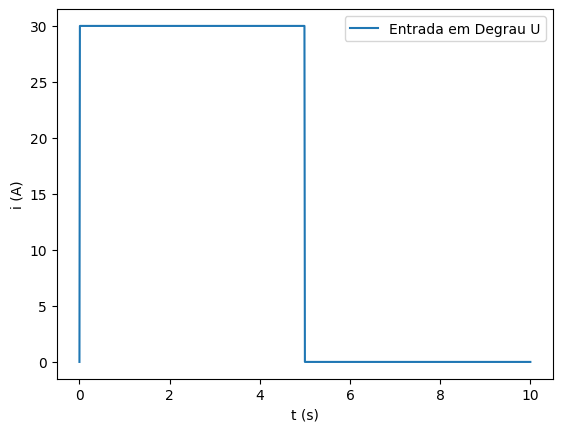

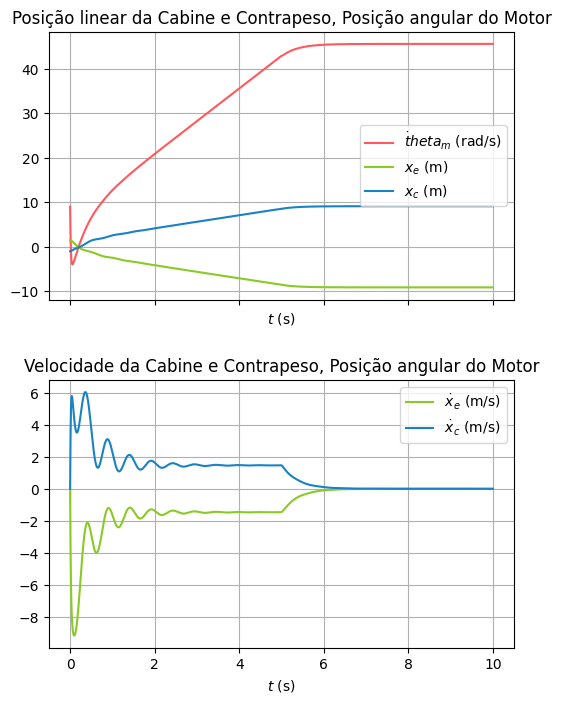

In [80]:
#PLOT MALHA ABERTA - NÃO LINEAR 

ts = np.linspace(0, 10, 1001)
w = np.linspace(0.1, 0.1, 1001)
x0 = [9, 1.5, -1, 0, 0]

U_deg_lista = ([]) # Esforço aplicado à torreta - entrada em degrau
#calcula as entradas para cada instante de tempo
for t in ts:
  if 0 < t < 5:
    U_deg_lista.append(30)
  #elif 7.5 < t < 8.5:
    #U_deg_lista.append(-40)
  else:
    U_deg_lista.append(0)
    

plt.plot(ts, U_deg_lista, label='Entrada em Degrau U')
plt.xlabel('t (s)')
plt.ylabel('i (A)')
plt.legend()

returnSimulation = ct.forced_response(elevador_SS, U=U_deg_lista, T=ts, X0=x0, return_x=True)

fig, (state_ain, state_pend) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
#fig, (state_pend, state_ain) = plt.title('Gráfico da Velocidade Angular', 'Gráfico da Velocidade Angular')

print(returnSimulation.states)

#state_pend.plot(returnSimulation.time, returnSimulation.states[3,:], color=cp['red'], label=r'$dot theta_m$ (rad/s)')
state_pend.plot(returnSimulation.time, returnSimulation.states[3, :], color=cp['green'], label=r'$\dot x_e$ (m/s)')
state_pend.plot(returnSimulation.time, returnSimulation.states[4, :], color=cp['blue'], label=r'$\dot x_c$ (m/s)')

state_ain.plot(returnSimulation.time, returnSimulation.states[0, :], color=cp['red'], label=r'$\dot theta_m$ (rad/s)')
state_ain.plot(returnSimulation.time, returnSimulation.states[1, :], color=cp['green'], label=r'$x_e$ (m)')
state_ain.plot(returnSimulation.time, returnSimulation.states[2, :], color=cp['blue'], label=r'$x_c$ (m)')

# Ajustando espaçamento vertical entre os subplots
plt.subplots_adjust(hspace=0.3)

# state_pend.set_ylabel(r'$x$')
state_pend.set_title('Velocidade da Cabine e Contrapeso, Posição angular do Motor')
state_ain.set_title('Posição linear da Cabine e Contrapeso, Posição angular do Motor')
state_pend.set_xlabel(r'$t$ (s)')
state_pend.legend()
state_pend.grid()
state_ain.set_xlabel(r'$t$ (s)')
state_ain.legend()
state_ain.grid()

## 2.1. Verificação de controlabilidade e observabilidade

In [81]:

print('Posto de controlabilidade = ', np.linalg.matrix_rank(ct.ctrb(A, B)))
print('Posto de observabilidade = ', np.linalg.matrix_rank(ct.obsv(A, C)))

Posto de controlabilidade =  5
Posto de observabilidade =  5


In [82]:
#Matriz de controlabilidade
Ctb = ct.ctrb(A, B)
Ctb

array([[ 2.44140625e-01, -1.38282776e+01,  8.20609364e+02,
        -4.65810811e+04,  2.63864083e+06],
       [ 0.00000000e+00,  0.00000000e+00, -7.08007812e+00,
         4.19145050e+02, -2.38440716e+04],
       [ 0.00000000e+00,  0.00000000e+00,  7.86675347e+00,
        -4.67954377e+02,  2.65055061e+04],
       [ 0.00000000e+00, -7.08007812e+00,  4.19145050e+02,
        -2.38440716e+04,  1.35111614e+06],
       [ 0.00000000e+00,  7.86675347e+00, -4.67954377e+02,
         2.65055061e+04, -1.50094674e+06]])

In [83]:
#Matriz de Observabilidade
Obs = ct.obsv(A, C)
Obs

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [-5.66406250e+01, -1.41601562e+02,  1.41601562e+02,
        -2.50000000e+00,  2.50000000e+00],
       [-2.90000000e+01, -1.45000000e+02,  0.00000000e+00,
        -2.56000000e+00,  0.00000000e+00],
       [ 3.22222222e+01,  0.00000000e+00, -1.61111111e+02,
         0.00000000e+00, -2.84444444e+00],
       [ 3.36121596e+03,  8.38290100e+03, -8.42317878e+03,
         6.40000000e+00, -7.11111111e+00],
       [ 1.71681813e+03,  4.47764531e+03, -4.10644531e+03,
        -6.59464000e+01, -7.25000000e+01],
       [-1.91674113e+03, -4.56271701e+03,  5.02098862e+03,
        -8.05555556e+01, -7.24646914e+01],
       [-1.90796108e+05, -4.76881431e+05,  4.77099110e+05,
        -3.65228889e+01

##2.2 Verificação da Estabilidade

In [84]:
print("autovalores de A = ", np.linalg.eig(A)[0])
#ct.pzmap(elevador_SS)

autovalores de A =  [-5.66406250e+01 +0.j          4.63451512e-15 +0.j
 -2.69509212e+00 +0.j         -1.35467616e+00+12.29635034j
 -1.35467616e+00-12.29635034j]


## 3.1 Projeto de Controlador LQR

In [85]:
Q = np.diag([10, 10, 10, 10, 10])
R = [1]

# Matriz de ganhos de controle
K_lq, P_lq, poles_lq = ct.lqr(elevador_SS, Q, R)

# Polos do sistema em malha fechada
print("Polos lqr:",poles_lq)
print("Ganhos lqr:",K_lq)

Polos lqr: [-56.64331519 +0.j          -2.62142593 +0.j
  -0.82484021 +0.j          -1.35475156+12.29630625j
  -1.35475156-12.29630625j]
Ganhos lqr: [[ 3.08844541 -0.57536353  0.41408612 -3.00380396  2.72373603]]


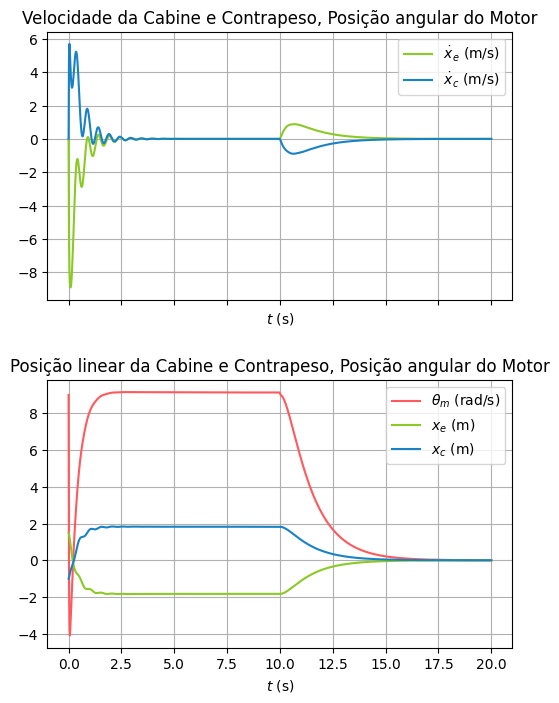

In [86]:
A_lqr = A - np.matmul(B, K_lq)

elevador_CLLQ_SS = ct.ss(A - np.dot(B, K_lq), B, C, D)

ts = np.linspace(0, 20, 1001)
w = np.linspace(0.1, 0.1, 1001)
x0 = [9, 1.5, -1, 0, 0]

returnSimulation_lqr = ct.forced_response(elevador_CLLQ_SS, U=U_deg_lista, T=ts, X0=x0, return_x=False)

fig, (state_pend, state_ain) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
#fig, (state_pend, state_ain) = plt.title('Gráfico da Velocidade Angular', 'Gráfico da Velocidade Angular')

#state_pend.plot(returnSimulation_lqr.time, returnSimulation_lqr.states[], color=cp['red'], label=r'$dot theta_m$ (rad/s)')
state_pend.plot(returnSimulation_lqr.time, returnSimulation_lqr.states[3, :], color=cp['green'], label=r'$\dot x_e$ (m/s)')
state_pend.plot(returnSimulation_lqr.time, returnSimulation_lqr.states[4, :], color=cp['blue'], label=r'$\dot x_c$ (m/s)')

state_ain.plot(returnSimulation_lqr.time, returnSimulation_lqr.states[0, :], color=cp['red'], label=r'$\theta_m$ (rad/s)')
state_ain.plot(returnSimulation_lqr.time, returnSimulation_lqr.states[1, :], color=cp['green'], label=r'$x_e$ (m)')
state_ain.plot(returnSimulation_lqr.time, returnSimulation_lqr.states[2, :], color=cp['blue'], label=r'$x_c$ (m)')

# Ajustando espaçamento vertical entre os subplots
plt.subplots_adjust(hspace=0.3)

# state_pend.set_ylabel(r'$x$')
state_pend.set_title('Velocidade da Cabine e Contrapeso, Posição angular do Motor')
state_ain.set_title('Posição linear da Cabine e Contrapeso, Posição angular do Motor')
state_pend.set_xlabel(r'$t$ (s)')
state_pend.legend()
state_pend.grid()
state_ain.set_xlabel(r'$t$ (s)')
state_ain.legend()
state_ain.grid()

## 3.2 Projeto de controlador por alocação de pólos

In [87]:
# Matriz de ganhos de controle
K_pp = ct.place(A, B,poles_lq)  # polos obtidos a partir do LQR

# K_pp = ct.place(A, B, [-7+3j, -7-3j, -0.5, -0.6]) # "agressivo"

print(K_pp)

# Verificação dos autovalores de (A - B K)
print("polos de malha fechada = ",
      np.linalg.eig(A - np.dot(B, K_pp))[0])

[[ 3.08844541 -0.57536353  0.41408612 -3.00380396  2.72373603]]
polos de malha fechada =  [-56.64331519 +0.j          -2.62142593 +0.j
  -0.82484021 +0.j          -1.35475156+12.29630625j
  -1.35475156-12.29630625j]


In [88]:
# Sistema em malha fechada na forma de espaço de estados
elevador_CLPP_SS = ct.ss(A - np.dot(B, K_pp), B, C, D)

elevador_CLPP_SS

StateSpace(array([[ -57.39463999, -141.46109289,  141.50046726,   -1.76664942,
           1.83502538],
       [   0.        ,    0.        ,    0.        ,    1.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           1.        ],
       [ -29.        , -145.        ,    0.        ,   -2.56      ,
           0.        ],
       [  32.22222222,    0.        , -161.11111111,    0.        ,
          -2.84444444]]), array([[0.24414062],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]]), array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]]), array([[0.],
       [0.],
       [0.]]))

[[ 9.00000000e+00 -1.04082015e+00 -3.71964310e+00 ...  5.80839651e-05
   5.71336255e-05  5.61988349e-05]
 [ 0.00000000e+00 -5.82301699e+00 -7.85753944e+00 ...  9.67749548e-06
   9.51915907e-06  9.36341457e-06]
 [ 0.00000000e+00  4.89084535e+00  5.69781721e+00 ... -9.68213633e-06
  -9.52372022e-06 -9.36789464e-06]]


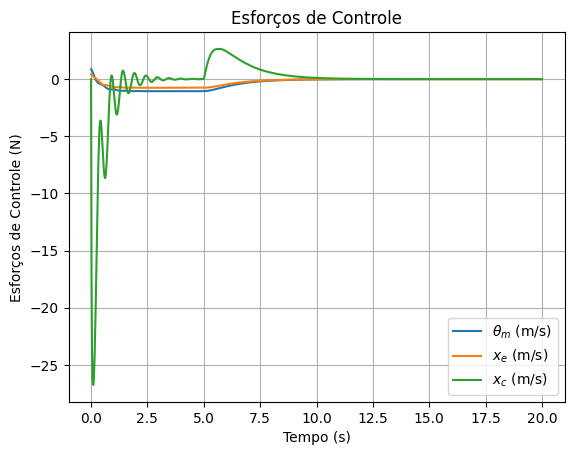

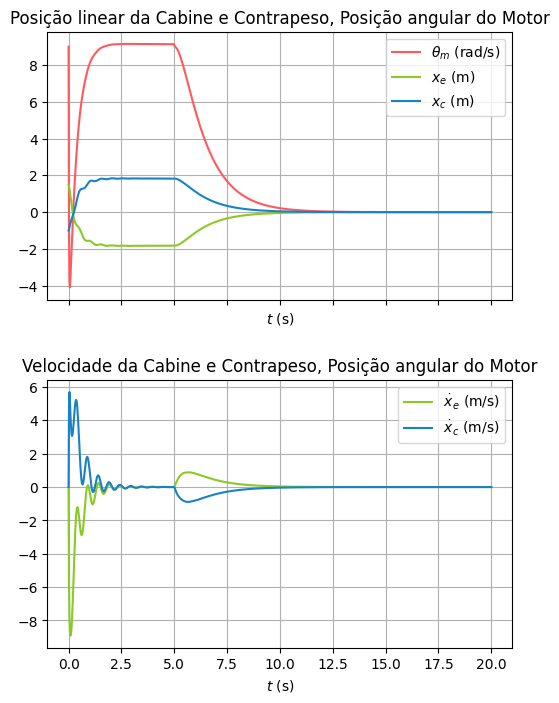

In [89]:
ts = np.linspace(0, 20, 1001)
w = np.linspace(0.1, 0.1, 1001)
x0 = [9, 1.5, -1, 0, 0]


U_deg_lista = ([]) # Esforço aplicado à torreta - entrada em degrau
#calcula as entradas para cada instante de tempo
for t in ts:
  if 0 < t < 5:
    U_deg_lista.append(30)
  #elif 7.5 < t < 8.5:
    #U_deg_lista.append(-40)
  else:
    U_deg_lista.append(0)

t, u, x = ct.forced_response(elevador_CLPP_SS, U=U_deg_lista, T=ts, X0=x0, return_x=True)
returnSimulation_aloc= ct.forced_response(elevador_CLPP_SS, U=U_deg_lista, T=ts, X0=x0, return_x=True)
print(returnSimulation_aloc.outputs)

esforcos_aloc = -K_pp * x.T

plt.plot(t, esforcos_aloc[:,1],label=r'$\theta_m$ (m/s)')
plt.plot(t, esforcos_aloc[:,2],label=r'$x_e$ (m/s)')
plt.plot(t, esforcos_aloc[:,3],label=r'$x_c$ (m/s)')
plt.legend()
plt.title('Esforços de Controle')
plt.xlabel('Tempo (s)')
plt.grid()
plt.ylabel('Esforços de Controle (N)')
 
fig, (state_ain, state_pend) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
#fig, (state_pend, state_ain) = plt.title('Gráfico da Velocidade Angular', 'Gráfico da Velocidade Angular')

state_pend.plot(t, x[3, :], color=cp['green'], label=r'$\dot x_e$ (m/s)')
state_pend.plot(t, x[4, :], color=cp['blue'], label=r'$\dot x_c$ (m/s)')

state_ain.plot(t, x[0, :], color=cp['red'], label=r'$\theta_m$ (rad/s)')
state_ain.plot(t, x[1, :], color=cp['green'], label=r'$x_e$ (m)')
state_ain.plot(t, x[2, :], color=cp['blue'], label=r'$x_c$ (m)')


# Ajustando espaçamento vertical entre os subplots
plt.subplots_adjust(hspace=0.3)

# state_pend.set_ylabel(r'$x$')
state_pend.set_title('Velocidade da Cabine e Contrapeso, Posição angular do Motor')
state_ain.set_title('Posição linear da Cabine e Contrapeso, Posição angular do Motor')
state_pend.set_xlabel(r'$t$ (s)')
state_pend.legend()
state_pend.grid()
state_ain.set_xlabel(r'$t$ (s)')
state_ain.legend()
state_ain.grid()

In [90]:
"Projeto Observador de Luenberger"
print(poles_lq)
L = ct.place(A.T, C.T, poles_lq)
Ltrans = L.T

print("Ganhos do Observador",L)

A_obs=  A_lqr - np.matmul(Ltrans,C)
B_obs = np.column_stack((B,L.T))
C_obs = np.eye(5,5)
D_obs = np.zeros(shape=(5,4))

print(B_obs.shape,D_obs.shape)

print("polos de malha fechada = ",
      np.linalg.eig(A_obs)[0])


elevador_obs = ct.ss(A_obs, B_obs, C_obs, D_obs)
elevador_CLPP_SS

[-56.64331519 +0.j          -2.62142593 +0.j
  -0.82484021 +0.j          -1.35475156+12.29630625j
  -1.35475156-12.29630625j]
Ganhos do Observador [[-19.30219611  -0.14118606   0.06746737 -11.18584482  12.51554616]
 [ 16.97972985   0.4512193   -0.4370694   10.08810565 -11.02304098]
 [-15.35300189  -0.44988589   0.43745095  -9.1092158    9.96810546]]
(5, 4) (5, 4)
polos de malha fechada =  [-56.64393636 +0.j          -1.35483835+12.29623488j
  -1.35483835-12.29623488j  -3.37497555 +0.j
  -0.82451082 +0.j        ]


StateSpace(array([[ -57.39463999, -141.46109289,  141.50046726,   -1.76664942,
           1.83502538],
       [   0.        ,    0.        ,    0.        ,    1.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           1.        ],
       [ -29.        , -145.        ,    0.        ,   -2.56      ,
           0.        ],
       [  32.22222222,    0.        , -161.11111111,    0.        ,
          -2.84444444]]), array([[0.24414062],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]]), array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]]), array([[0.],
       [0.],
       [0.]]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


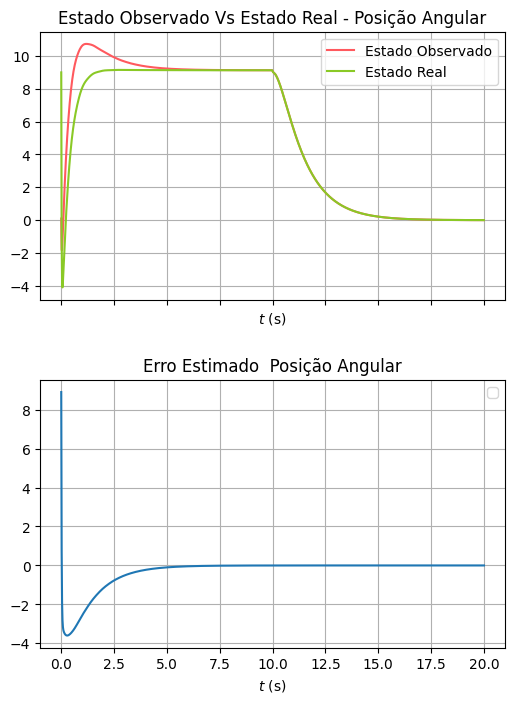

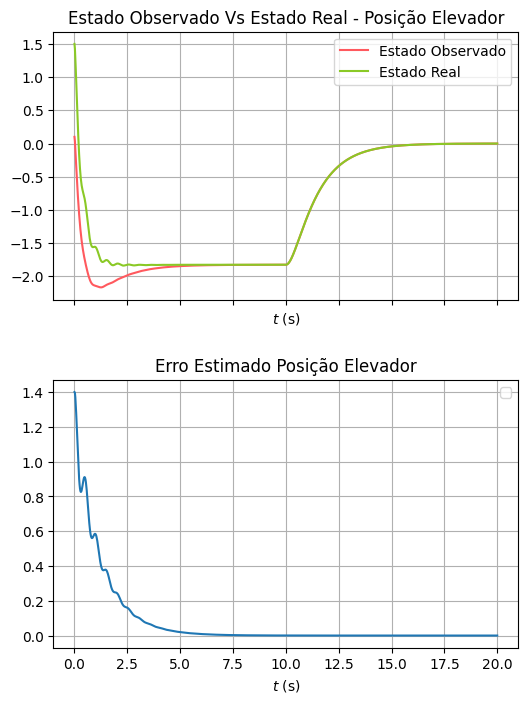

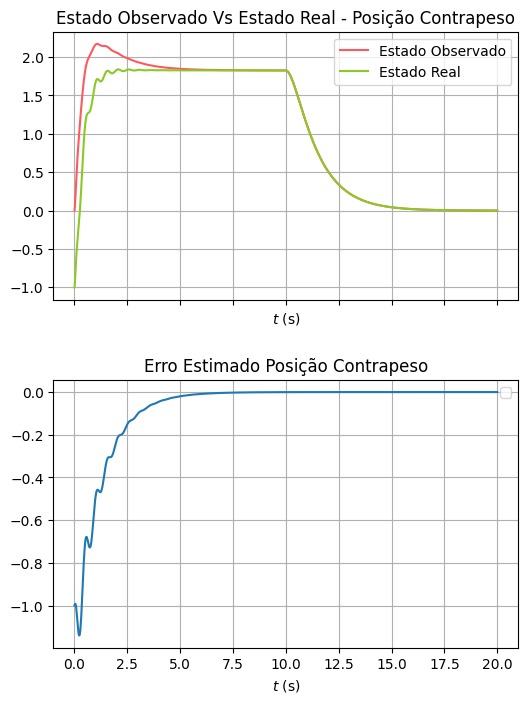

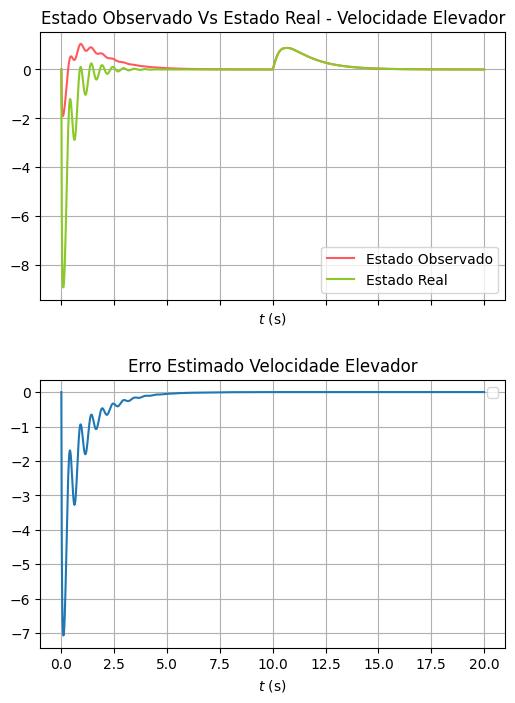

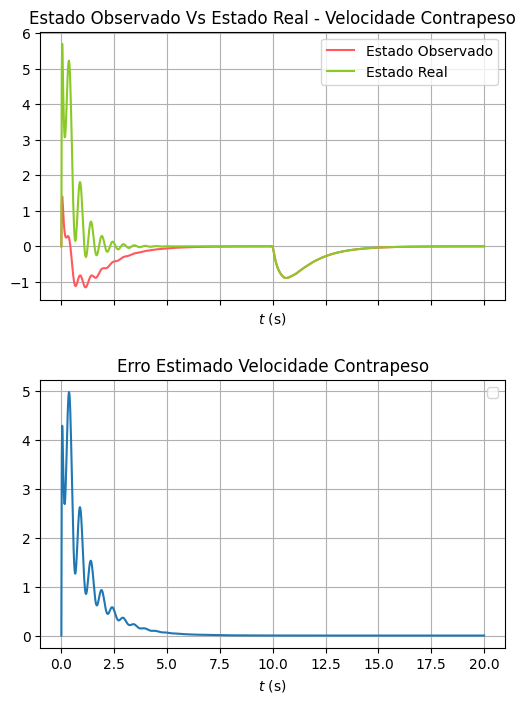

In [97]:
'OBSERVADOR MALHA FECHADA'

ts = np.linspace(0, 20, 1001)
w = np.linspace(0.1, 0.1, 1001)
x0_obs = np.array([0.1, 0.1, -0., 0, 0])

input_obs = np.row_stack((returnSimulation_lqr.inputs,returnSimulation_lqr.outputs))

returnSimulation_obs = ct.forced_response(elevador_obs, U=input_obs, T=ts, X0=x0_obs, return_x=True)

statesObserver = returnSimulation_obs.states
statesSystem = returnSimulation_lqr.states

estimationError = statesSystem - statesObserver 

stateNumber = 0

fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001])

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Posição Angular')
state_erro1.set_title('Erro Estimado  Posição Angular')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MF_Xm.png")


stateNumber = 1
fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'],label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001])

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Posição Elevador')
state_erro1.set_title('Erro Estimado Posição Elevador')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MF_Xe.png")


stateNumber = 2

fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001])

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Posição Contrapeso')
state_erro1.set_title('Erro Estimado Posição Contrapeso')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MF_Xc.png")


stateNumber = 3

fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001])

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Velocidade Elevador')
state_erro1.set_title('Erro Estimado Velocidade Elevador')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MF_Xc.png")

stateNumber = 4

fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001])

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Velocidade Contrapeso')
state_erro1.set_title('Erro Estimado Velocidade Contrapeso')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MF_Xc.png")

[[ 0.00000000e+00  3.00000000e+01  3.00000000e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.00000000e+00  2.53199865e+00 -9.41097616e-01 ...  4.55478474e+01
   4.55478475e+01  4.55478477e+01]
 [ 0.00000000e+00 -3.69018735e+00 -5.85676311e+00 ...  1.66922586e-05
   1.67915933e-05  1.66021296e-05]
 [ 0.00000000e+00  3.30060670e+00  4.92824539e+00 ...  2.33309966e-05
   2.32549620e-05  2.28634128e-05]]


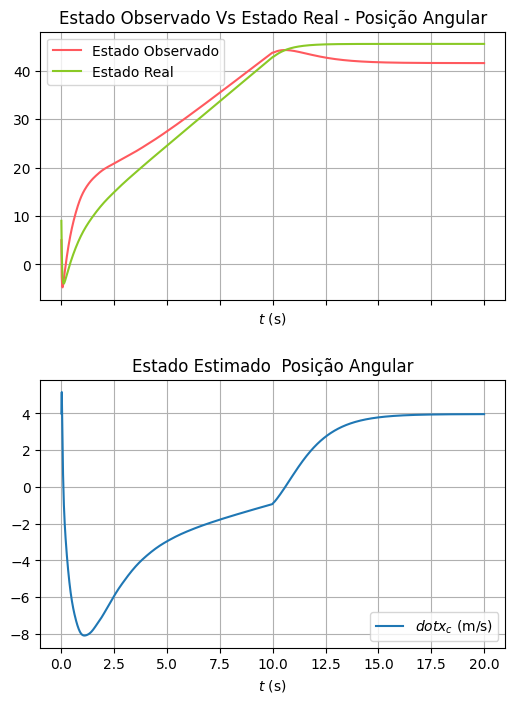

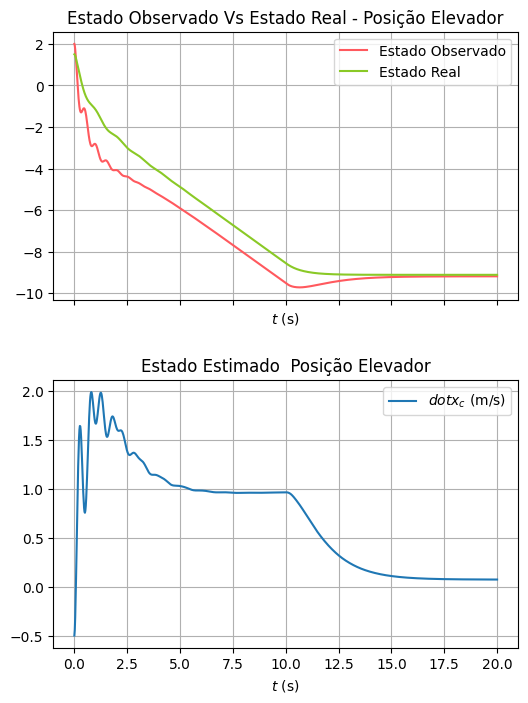

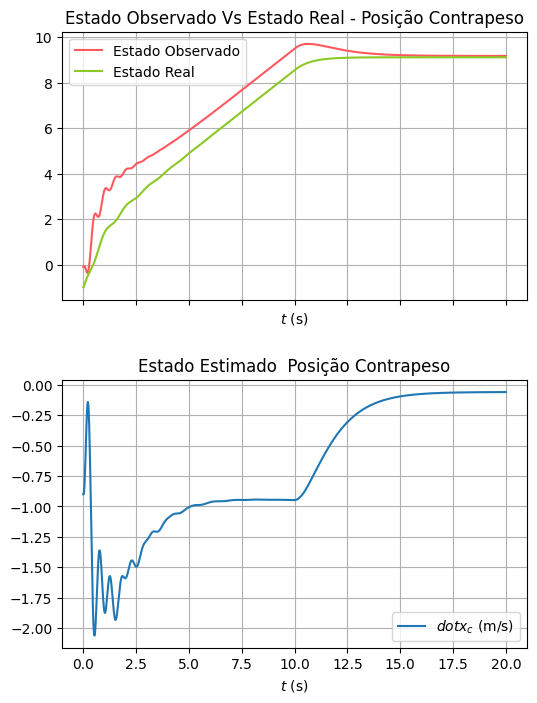

In [92]:
'OBSERVADOR MALHA ABERTA'

ts = np.linspace(0, 20, 1001)
w = np.linspace(0.1, 0.1, 1001)
x0_obs = [5, 2, -0.1, 0, 0]

input_obs = np.row_stack((returnSimulation.inputs,returnSimulation.outputs))
print(input_obs)

returnSimulation_obs = ct.forced_response(elevador_obs, U=input_obs, T=ts, X0=x0_obs, return_x=True)

statesObserver = returnSimulation_obs.states
statesSystem = returnSimulation.states

estimationError = statesSystem - statesObserver 

stateNumber = 0

fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001], label=r'$dotx_c$ (m/s)')

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Posição Angular')
state_erro1.set_title('Estado Estimado  Posição Angular')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MA_Xm.png")


stateNumber = 1
fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001], label=r'$dotx_c$ (m/s)')

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Posição Elevador')
state_erro1.set_title('Estado Estimado  Posição Elevador')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MA_Xe.png")


stateNumber = 2
fig, (state_obs1, state_erro1) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

state_obs1.plot(returnSimulation_obs.time,statesObserver[stateNumber,0:1001], color=cp['red'], label=r'Estado Observado')
state_obs1.plot(returnSimulation_obs.time,statesSystem[stateNumber,0:1001], color=cp['green'], label=r'Estado Real')
state_erro1.plot(returnSimulation_obs.time,estimationError[stateNumber,0:1001], label=r'$dotx_c$ (m/s)')

plt.subplots_adjust(hspace=0.3)

state_obs1.set_title('Estado Observado Vs Estado Real - Posição Contrapeso')
state_erro1.set_title('Estado Estimado  Posição Contrapeso')
state_obs1.set_xlabel(r'$t$ (s)')
state_obs1.legend()
state_obs1.grid()
state_erro1.set_xlabel(r'$t$ (s)')
state_erro1.legend()
state_erro1.grid()
plt.savefig("Obs_MA_Xc.png")


In [93]:
# degrau ou rampa
A_r = np.array([[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0]])

In [94]:
# seleção de variável para seguir referência
M = np.array([[1, 0, 0, 0, 0]])

# inversa da matriz de estados em MF
A_cl_inv = np.linalg.inv(A - B @ K_lq)

# ganho de pré-alimentação
N = np.linalg.inv(M @ A_cl_inv @ B) @ M @ A_cl_inv
G_r = N @ (A - A_r)
E.shape



(5, 1)

In [95]:
n = 5           # variáveis de estados
r = 1           # entradas
m = 3           # saídas
l = 1           # perturbações

# matrizes do sistema estendido em malha fechada
A_ex_cl = np.block([[A - B @ G_r, B @ (K_lq - G_r)],
                    [A_r - A + B @ G_r, A_r - B @ (K_lq - G_r)]])
#l = E.shape[1]  # número de colunas deve ser igual ao de E

E_ex_cl = np.block([[E], [np.zeros((n, l))]])
K_ex = np.block([[-G_r, K_lq - G_r]])

# forma de espaço de estados
elevador_ex_cl_SS = ct.ss(A_ex_cl, E_ex_cl, K_ex, 0)

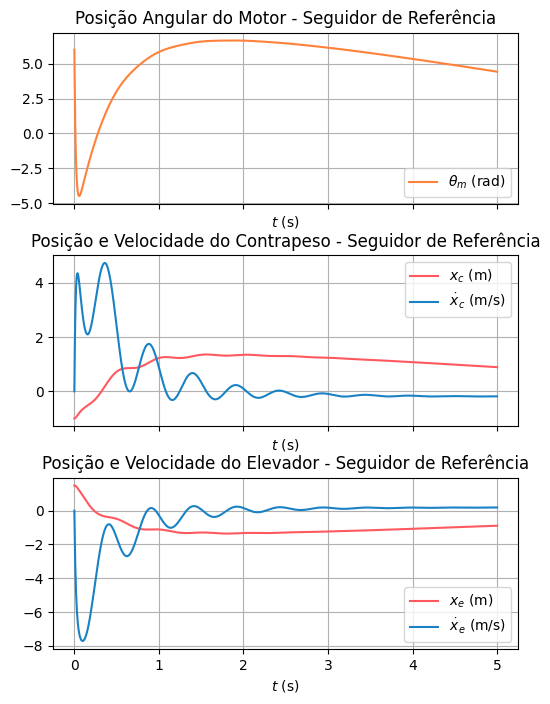

In [96]:
w = np.linspace(0.1, 0.1, 1001)
#x0 = [0, 0.2, -0.2, 0, 0]
x0 = [9, 1.5, -1, 0, 0]
Us = np.ones(1001)

ts = np.linspace(0, 5, 1001)
w = np.linspace(0.1, 0.1, 1001)
x0 = [6, 1.5, -1, 0, 0,
      np.pi, 0, 0, 0, 0]
# x0 = [0.0, 0.3, 0.0, 0.0,
#       0.0, 0.0, 1.0, 0.0]

U_deg_lista = ([]) # Esforço aplicado à torreta - entrada em degrau
#calcula as entradas para cada instante de tempo
for t in ts:
  if 0 < t < 5:
    U_deg_lista.append(30)
  #elif 7.5 < t < 8.5:
    #U_deg_lista.append(-40)
  else:
    U_deg_lista.append(0)
    
t, u, x = ct.forced_response(elevador_ex_cl_SS, U=U_deg_lista, T=ts, X0=x0, return_x=True)


fig, (state_final, state_pend, state_ain) = plt.subplots(3, 1, figsize=(6, 8), sharex=True)
#fig, (state_pend, state_ain) = plt.title('Gráfico da Velocidade Angular', 'Gráfico da Velocidade Angular')

state_pend.plot(t, x[2, :], color=cp['red'], label=r'$x_c$ (m)')
state_pend.plot(t, x[4, :], color=cp['blue'], label=r'$\dot x_c$ (m/s)')

state_ain.plot(t, x[1, :], color=cp['red'], label=r'$x_e$ (m)')
state_ain.plot(t, x[3, :], color=cp['blue'], label=r'$\dot x_e$ (m/s)')

state_final.plot(t, x[0, :], color=cp['orange'], label=r'$\theta_m$ (rad)')


# Ajustando espaçamento vertical entre os subplots
plt.subplots_adjust(hspace=0.3) 



# state_pend.set_ylabel(r'$x$')
state_pend.set_title('Posição e Velocidade do Contrapeso - Seguidor de Referência')
state_ain.set_title('Posição e Velocidade do Elevador - Seguidor de Referência')
state_final.set_title('Posição Angular do Motor - Seguidor de Referência')

state_pend.set_xlabel(r'$t$ (s)')
state_pend.legend()
state_pend.grid()
state_ain.set_xlabel(r'$t$ (s)')
state_ain.legend()
state_ain.grid()
state_final.set_xlabel(r'$t$ (s)')
state_final.legend()
state_final.grid()